# Read & plot historical oil price data

In [39]:
"""======================="""
"""  IMPORTING LIBRARIES  """
"""======================="""
# Import all necassary libraries used throughout
import datetime as dt
import pandas as pd
pd.set_option('float_format', '{:0.2f}'.format)
import numpy as np
import os
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")

# Import specific functions
import matplotlib as mpl
from matplotlib import pyplot as plt
fig_width=9
fig_height=4
mpl.rcParams['figure.dpi']= 200
mpl.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
mpl.rcParams.update({'font.size': 10})

"""
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
"""

from statsmodels.tsa.stattools import adfuller
from numpy import log
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima_model import ARIMA

# Hold the current working directory in a variable
pwd = os.getcwd()
#print(pwd)

In [2]:
"""======================="""
""" READ THE DATA         """
"""======================="""
## Import the csv file into a pandas DataFrame
df = pd.read_csv( pwd + '/historical_oil_prices.csv')

## Change column names to lowercases 
## for ease when typing
df.columns=['date', 'price']

## Cast the date column to type 'date'
df['date'] = pd.to_datetime(df['date'])
print("Data Set: \t"% df.columns, df.shape)
print("Data Types:\t", df.dtypes)

## Set the index of the table to be the date
df.set_index('date', inplace=True)
df = df.resample('D').ffill().reset_index()

## Check if there is any data missing
if df.isnull().values.any():
    print("Missing data")
    
## Print the last 10 rows of the table just 
## to see everything's halal
#df.tail(10)

Data Set: 	 (8542, 2)
Data Types:	 date     datetime64[ns]
price           float64
dtype: object


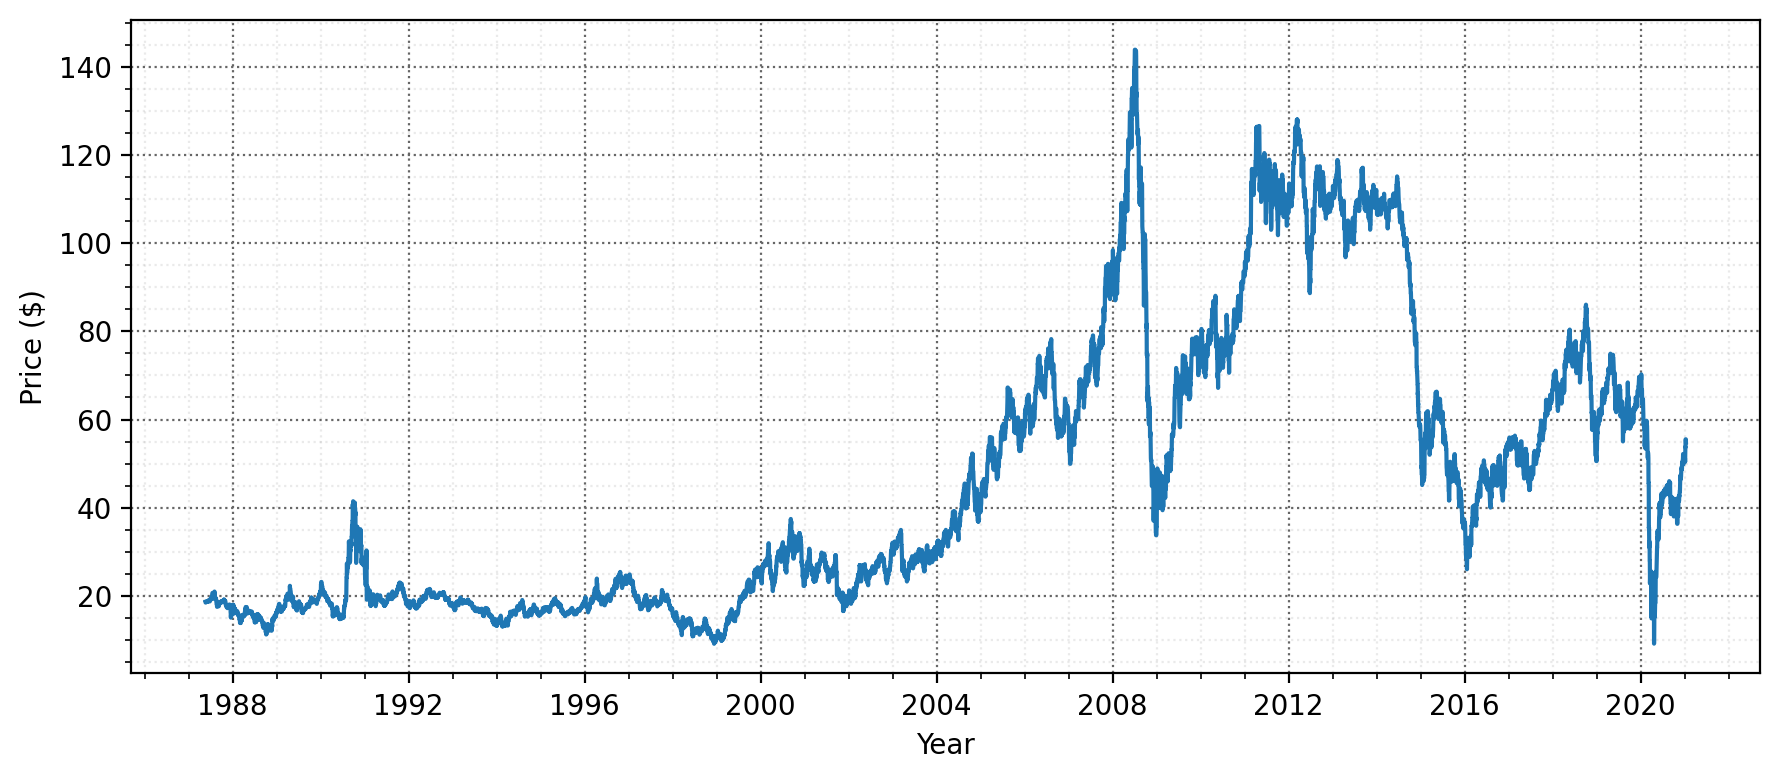

In [3]:
"""======================="""
""" PLOT THE DATA         """
"""======================="""
## Now we can plot the data to see some cool patterns
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
plt.plot(df['date'],df['price'])
#plt.title("Oil price")
plt.xlabel("Year")
plt.ylabel("Price ($)")
## Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle=':')
## Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle=':', alpha=0.2)
plt.tight_layout()
plt.savefig(pwd+"/oil_prices.png")
plt.show()

In [4]:
## Add columns for the year, month and day
df['year']  = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week']  = df['date'].dt.week

## This is super useful for when we want to
## isolate the data for a particular month or
## year. We can even run correlation studies 
## across months to see if a particular month
## is strongly correlated in terms of price 
## movement over the years.
summary = df.groupby("year").price.describe()
summary.head()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1987,226.00,18.53,0.96,15.03,17.93,18.60,19.05,20.95
1988,366.00,14.96,1.47,11.20,14.00,15.16,16.15,17.95
1989,365.00,18.27,1.25,16.05,17.20,18.15,19.18,22.25
1990,365.00,23.70,7.71,14.68,17.05,20.60,30.53,41.45
1991,365.00,20.02,1.91,17.60,18.75,19.63,20.73,30.28


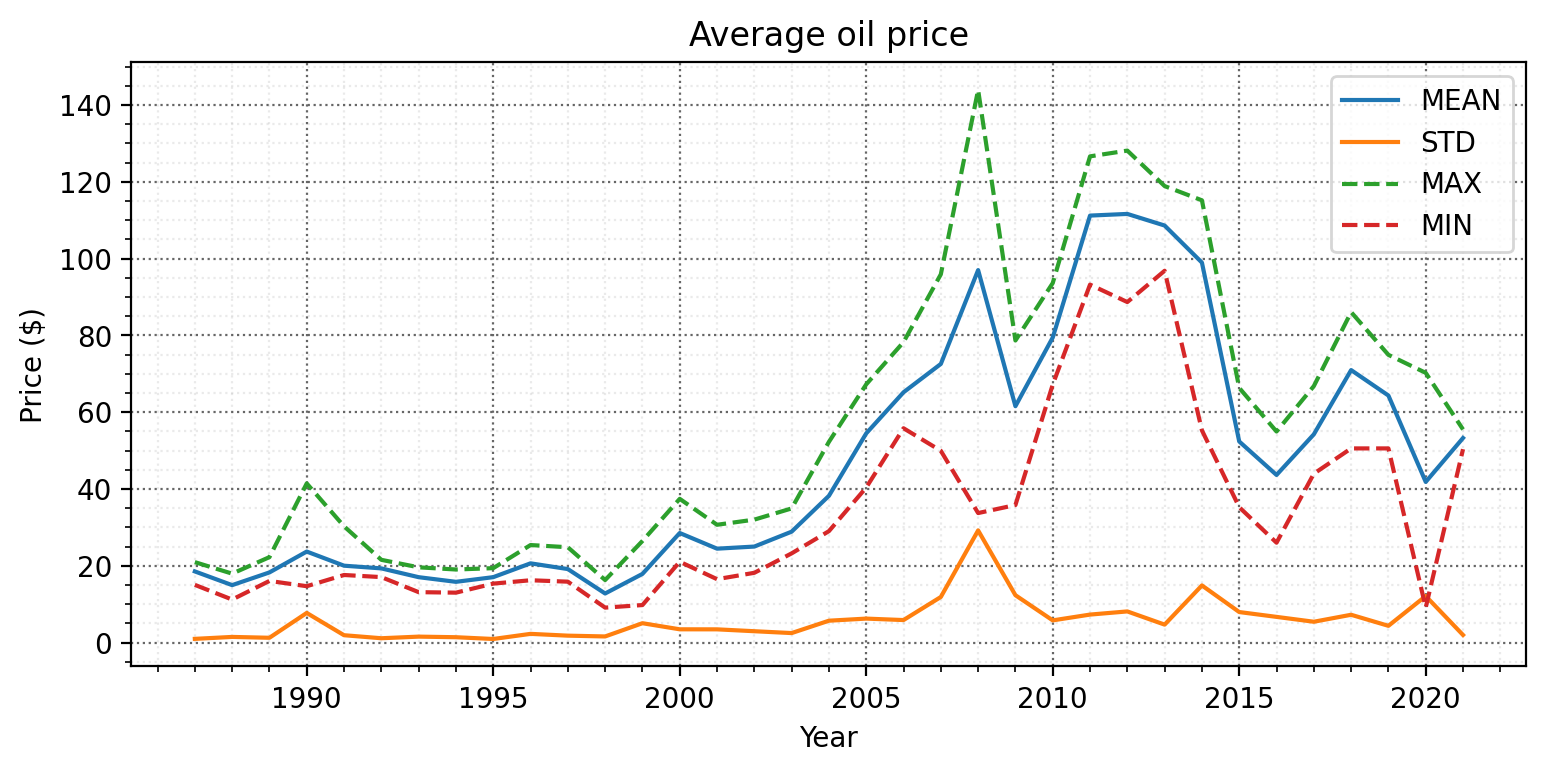

In [5]:
"""======================="""
""" PLOT THE DATA         """
"""======================="""
## Now we can plot the data to see some cool patterns
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
plt.plot(summary['mean'], label='MEAN')
plt.plot(summary['std'], label='STD')
plt.plot(summary['max'],linestyle='--', label='MAX')
plt.plot(summary['min'],linestyle='--', label='MIN')
plt.title("Average oil price")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.legend(loc='best')
## Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle=':')

## Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle=':', alpha=0.2)

plt.show()

In [6]:
partition_1 = df[(df['date']>='2000-01-01') & (df['date'] < '2005-01-01')]
partition_2 = df[(df['date']>='2015-01-01') & (df['date'] < '2020-01-01')]
print("MEAN\tP1: %0.2f\tP2: %0.2f" % (partition_1['price'].mean(), partition_2['price'].mean()))
print(" VAR\tP1: %0.2f\tP2: %0.2f" % (partition_1['price'].var(), partition_2['price'].var()))

MEAN	P1: 29.03	P2: 57.11
 VAR	P1: 38.59	P2: 132.98


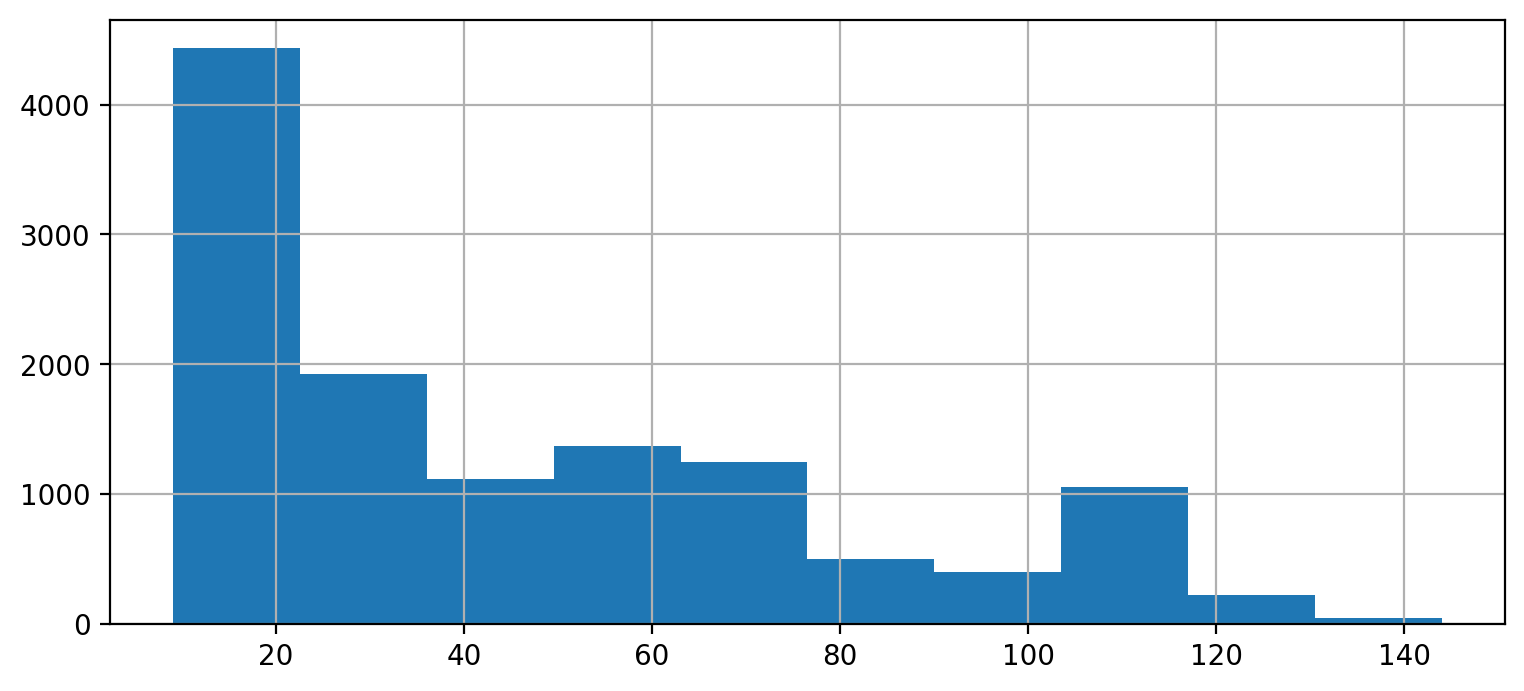

In [7]:
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
hist = df['price'].hist()
plt.show()

(array([ 186.,  884., 3086., 1196., 1004.,  922., 1547., 1592., 1003.,
         871.]),
 array([2.20827441, 2.48439357, 2.76051273, 3.03663189, 3.31275105,
        3.58887022, 3.86498938, 4.14110854, 4.4172277 , 4.69334686,
        4.96946602]),
 <a list of 10 Patch objects>)

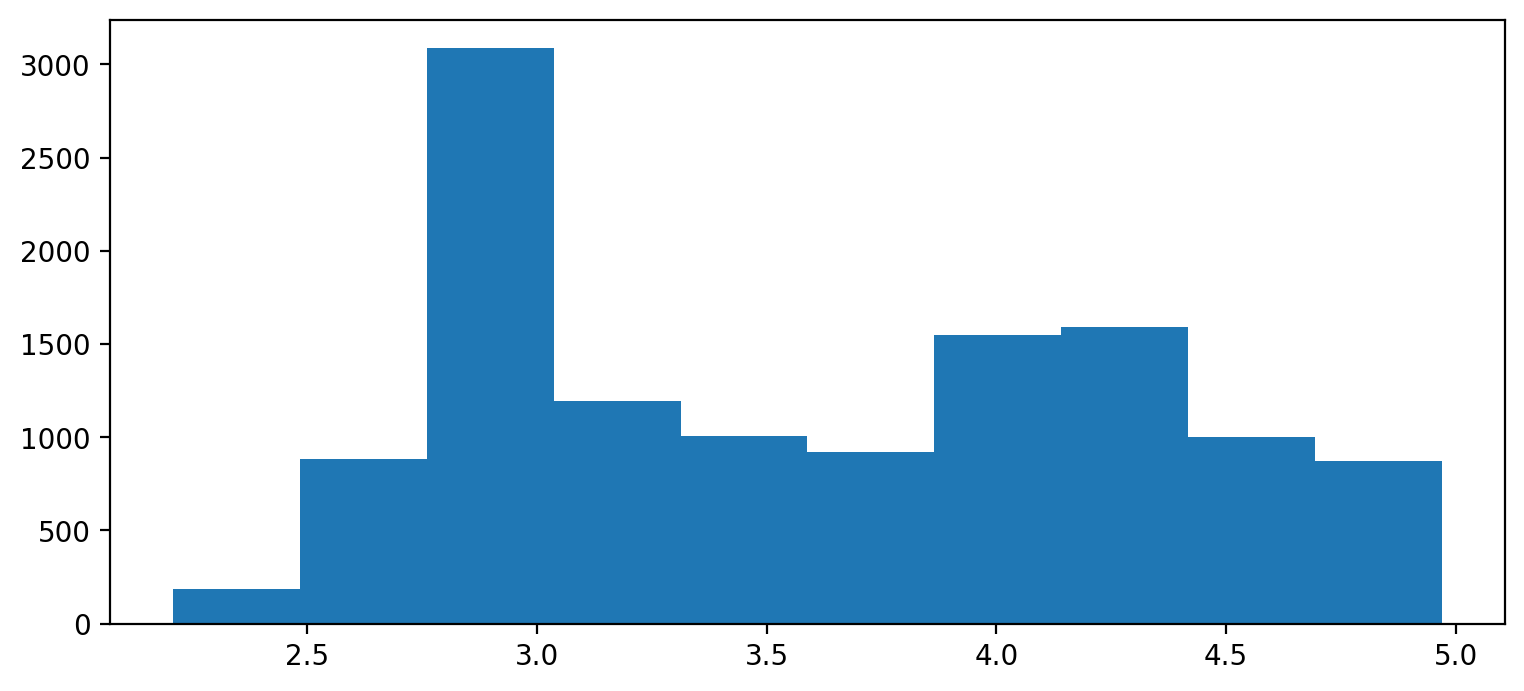

In [8]:
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
log_hist = np.log( df['price'] ) 
plt.hist(log_hist)

# Stationarity

In [9]:
"""======================="""
""" STATIONARITY TEST     """
"""======================="""
## Make a series to run the test on
table_daily_prices = pd.Series(data=df['price'].to_numpy(), index=df['date'])
table_daily_prices.describe()

count   12291.00
mean       46.45
std        32.31
min         9.10
25%        18.83
50%        33.20
75%        66.59
max       143.95
dtype: float64

In [10]:
## Run the Augmented Dickey-Fuller test
result = adfuller( table_daily_prices )
print('ADF Statistic: %.4f' % result[0])
print('\np-value: %.4f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('%s: %.2f' % (key, value))

## Print the result    
pvalue = result[1]
alpha  = 0.05
#print("\nalpha: %d%%"%(alpha*100))
print("\nalpha: %.2f"%(alpha))
if pvalue>alpha:
    print("NON-STATIONARY series")
elif pvalue<=alpha:
    print("STATIONARY series")

ADF Statistic: -2.0457

p-value: 0.2669

Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57

alpha: 0.05
NON-STATIONARY series


In [11]:
## FIRST ORDER DIFFERENCING
## Daily returns
daily_series_diff1 = table_daily_prices.diff(periods=1).dropna()
daily_series_diff1.head()

date
1987-05-21   -0.18
1987-05-22    0.10
1987-05-23    0.00
1987-05-24    0.00
1987-05-25    0.05
dtype: float64

In [12]:
## SECOND ORDER DIFFERENCING
## Differences in returns
daily_series_diff2 = daily_series_diff1.diff(periods=1).dropna()
## Make sure to drop the NaNs (not a numbers) because
## they will cause issues later when we design our model and 
## perform our forecasts.
daily_series_diff2.head()

date
1987-05-22    0.28
1987-05-23   -0.10
1987-05-24    0.00
1987-05-25    0.05
1987-05-26   -0.02
dtype: float64

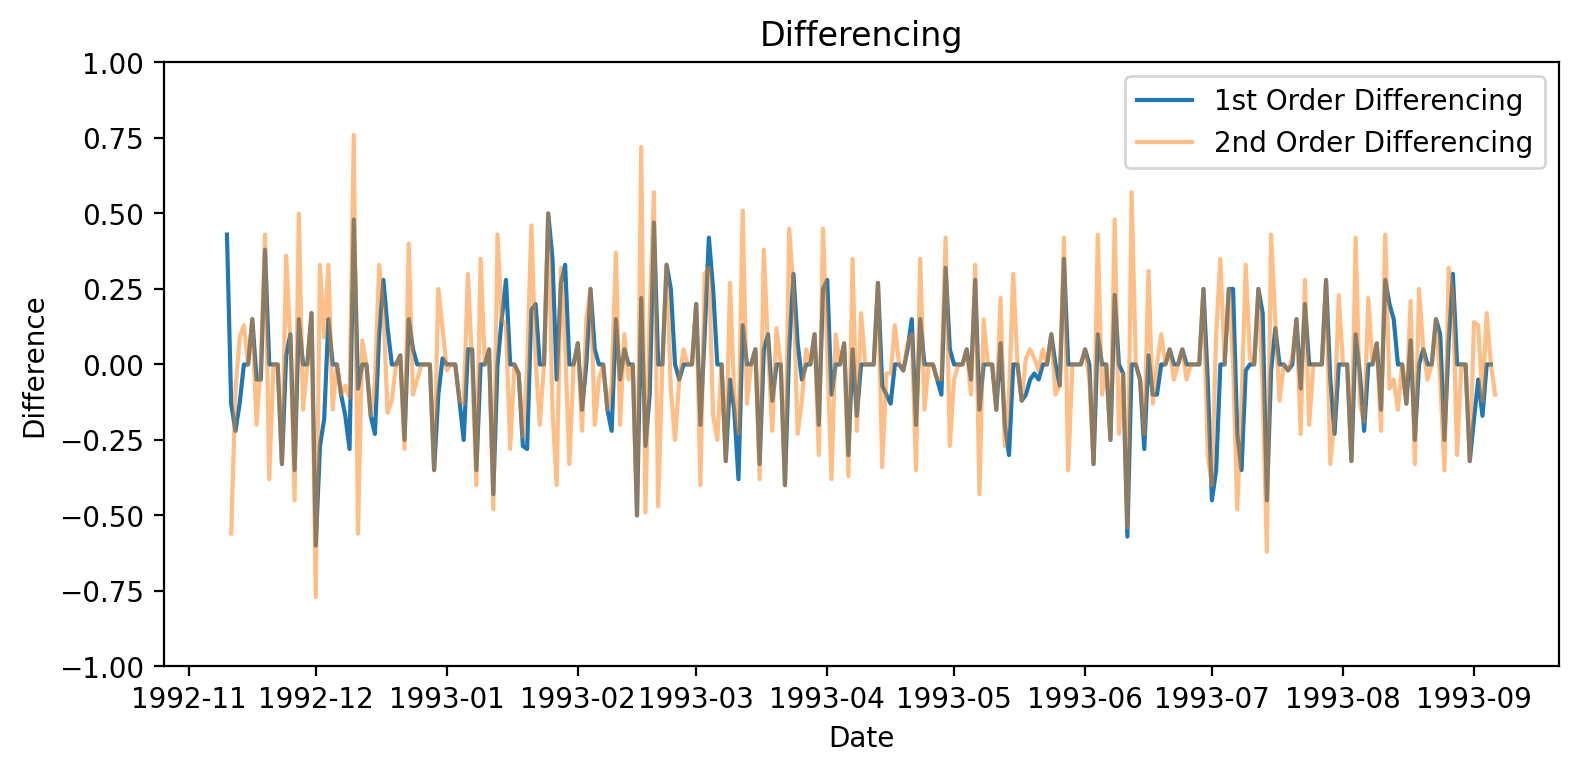

In [13]:
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
fig, ax = plt.subplots()
ax.plot(daily_series_diff1[2000:2300], label='1st Order Differencing', alpha=1.0)
ax.plot(daily_series_diff2[2000:2300], label='2nd Order Differencing', alpha=0.5)
plt.ylim([-1,1])

legend = ax.legend(loc='upper right')
plt.title('Differencing')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

The entire point of differencing is to make the time series stationary, and the difference is measured between today and yesterday until we reach a point where the statistical properties are constant over time.

Here, we can see that when we use a differencing method, the time series starts to look more like a stationary time series. Let's re-run the Augmented Dickey-Fuller test on the differencing time series.

In [14]:
## Run the Augmented Dickey-Fuller test
result = adfuller( daily_series_diff1 )
print('ADF Statistic: %.4f' % result[0])
print('\np-value: %.4f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('%s: %.2f' % (key, value))

## Print the result    
pvalue = result[1]
alpha  = 0.05
#print("\nalpha: %d%%"%(alpha*100))
print("\nalpha: %.2f"%(alpha))
if pvalue>alpha:
    print("NON-STATIONARY series")
elif pvalue<=alpha:
    print("STATIONARY series")

ADF Statistic: -15.2702

p-value: 0.0000

Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57

alpha: 0.05
STATIONARY series


In [15]:
## Run the Augmented Dickey-Fuller test
result = adfuller( daily_series_diff2 )
print('ADF Statistic: %.4f' % result[0])
print('\np-value: %.4f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('%s: %.2f' % (key, value))

## Print the result    
pvalue = result[1]
alpha  = 0.05
#print("\nalpha: %d%%"%(alpha*100))
print("\nalpha: %.2f"%(alpha))
if pvalue>alpha:
    print("NON-STATIONARY series")
elif pvalue<=alpha:
    print("STATIONARY series")

ADF Statistic: -30.2107

p-value: 0.0000

Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57

alpha: 0.05
STATIONARY series


In [16]:
## Number of differences required for a stationary series

## augmented Dickey–Fuller test (adf test)
print(" ADF Test: ",ndiffs(table_daily_prices, test='adf'))

## Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test
print("KPSS Test: ",ndiffs(table_daily_prices, test='kpss'))

## Phillips–Perron (PP) test:
print("  PP Test: ",ndiffs(table_daily_prices, test='pp'))

 ADF Test:  1
KPSS Test:  1
  PP Test:  1


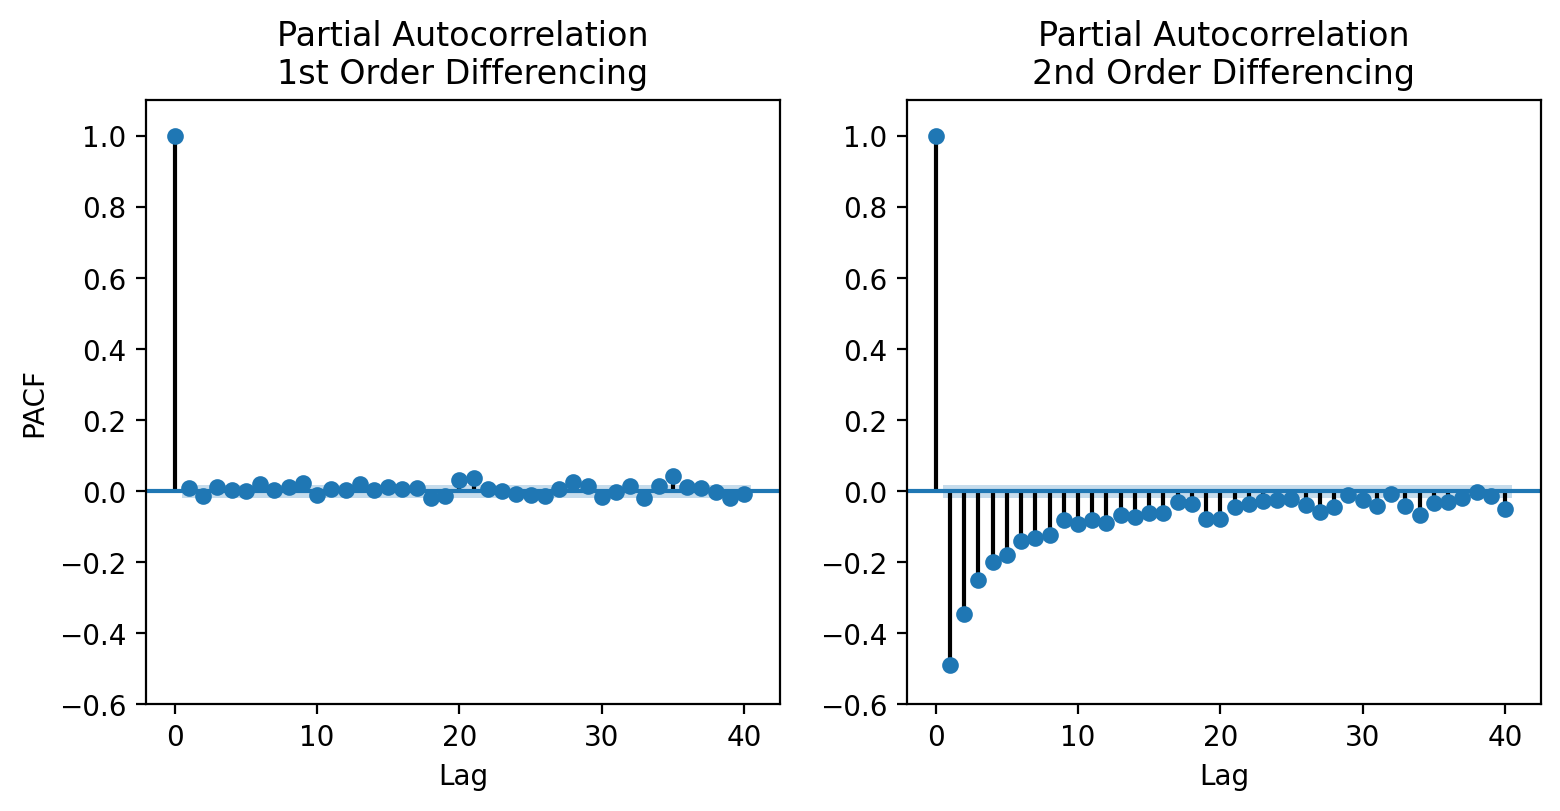

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
fig, axes = plt.subplots(1, 2, sharex=True)
num_lag = 40

plot_pacf(daily_series_diff1, lags=num_lag, ax=axes[0], title="Partial Autocorrelation\n1st Order Differencing")
plot_pacf(daily_series_diff2, lags=num_lag, ax=axes[1], title="Partial Autocorrelation\n2nd Order Differencing")

## Make it look pretty
axes[0].set_ylabel('PACF')
axes[0].set_xlabel('Lag')
axes[1].set_xlabel('Lag')
axes[0].set_ylim([-.6,1.1])
axes[1].set_ylim([-.6,1.1])

plt.show()

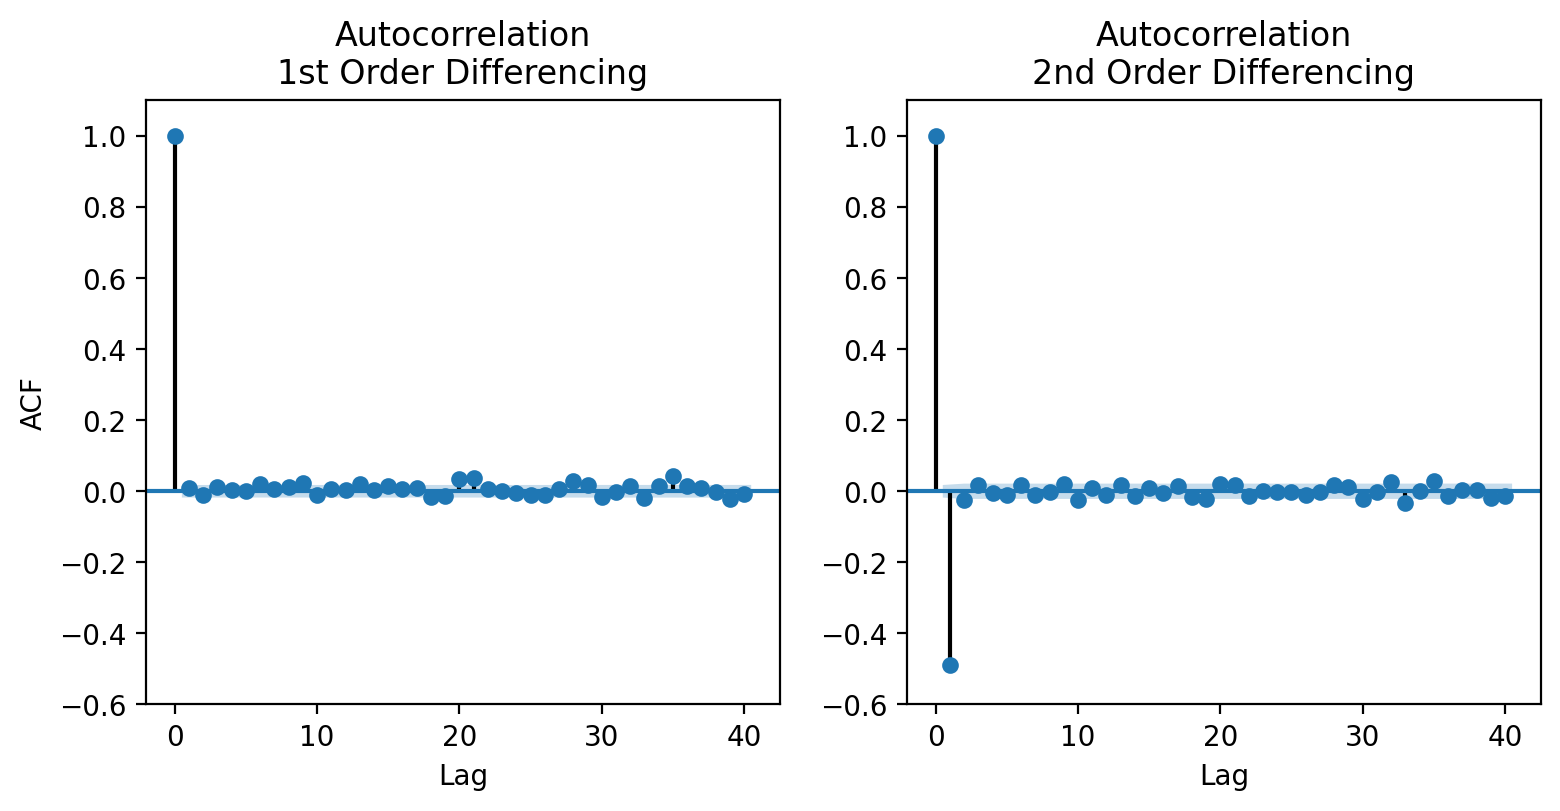

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
fig, axes = plt.subplots(1, 2, sharex=True)
num_lag = 40

plot_acf(daily_series_diff1, lags=num_lag, ax=axes[0], title="Autocorrelation\n1st Order Differencing")
plot_acf(daily_series_diff2, lags=num_lag, ax=axes[1], title="Autocorrelation\n2nd Order Differencing")

## Make it look pretty
axes[0].set_ylabel('ACF')
axes[0].set_xlabel('Lag')
axes[1].set_xlabel('Lag')
axes[0].set_ylim([-.6,1.1])
axes[1].set_ylim([-.6,1.1])

plt.show()

# Time for the Machine to Learn and predict

In [48]:
import pmdarima as pm
model = pm.auto_arima(table_daily_prices, 
                      start_p=1, 
                      start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3,          # maximum p 
                      max_q=3,          # maximum q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32721.430, Time=2.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32720.675, Time=1.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32721.472, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32721.442, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32718.802, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.165 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                12291
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -16358.401
Date:                Tue, 19 Jan 2021   AIC                          32718.802
Time:                        12:09:46   BIC                          32726.219
Sample:                             0   HQIC                         32721.287
                              - 12291                                  

In [79]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(table_daily_prices, order=(1, 0, 1)).fit(transparams=False)
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                12291
Model:                     ARMA(1, 1)   Log Likelihood              -16361.259
Method:                       css-mle   S.D. of innovations                nan
Date:                Tue, 19 Jan 2021   AIC                          32730.518
Time:                        12:19:51   BIC                          32760.185
Sample:                    05-20-1987   HQIC                         32740.458
                         - 01-11-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.1770     18.440      2.884      0.004      17.036      89.318
ar.L1.y        0.9996      0.000   3770.723      0.000       0.999       1.000
ma.L1.y        0.0103      0.009      1.133      0.2

In [80]:
ARIMA_Predict = model.predict(start='01/01/2000', end='6/30/2021')

In [91]:
ARIMA_Predict

2000-01-01   24.94
2000-01-02   24.94
2000-01-03   24.94
2000-01-04   24.94
2000-01-05   23.95
              ... 
2021-06-26   54.72
2021-06-27   54.72
2021-06-28   54.72
2021-06-29   54.72
2021-06-30   54.71
Freq: D, Length: 7852, dtype: float64

In [103]:
prediction = pd.DataFrame(ARIMA_Predict, columns=['predictions'])#.to_csv('prediction.csv')
#prediction.head()
ARIMA2021 = prediction[(prediction.index >= '2019-12-31')] 
ARIMA2021.head()

,predictions
2019-12-31,68.29
2020-01-01,67.76
2020-01-02,67.76
2020-01-03,67.04
2020-01-04,69.09


In [104]:
start = '2000-01-01'
end   = '2019-12-31'
"""=================================="""
""" SPLIT INTO TRAINING & TESTS SETS """
"""=================================="""
train = df[(df['date' ] >= start) & (df['date' ] < end)]
test  = df[df['date' ] >= end]

In [105]:
from fbprophet import Prophet
d={'ds':train['date'],'y':train['price']}
df_pred=pd.DataFrame(data=d)

model = Prophet(daily_seasonality=False)
model.fit(df_pred)

In [112]:
future = model.make_future_dataframe(periods=548)
forecast = model.predict(future)

(0.0, 200.0)

<Figure size 1800x800 with 0 Axes>

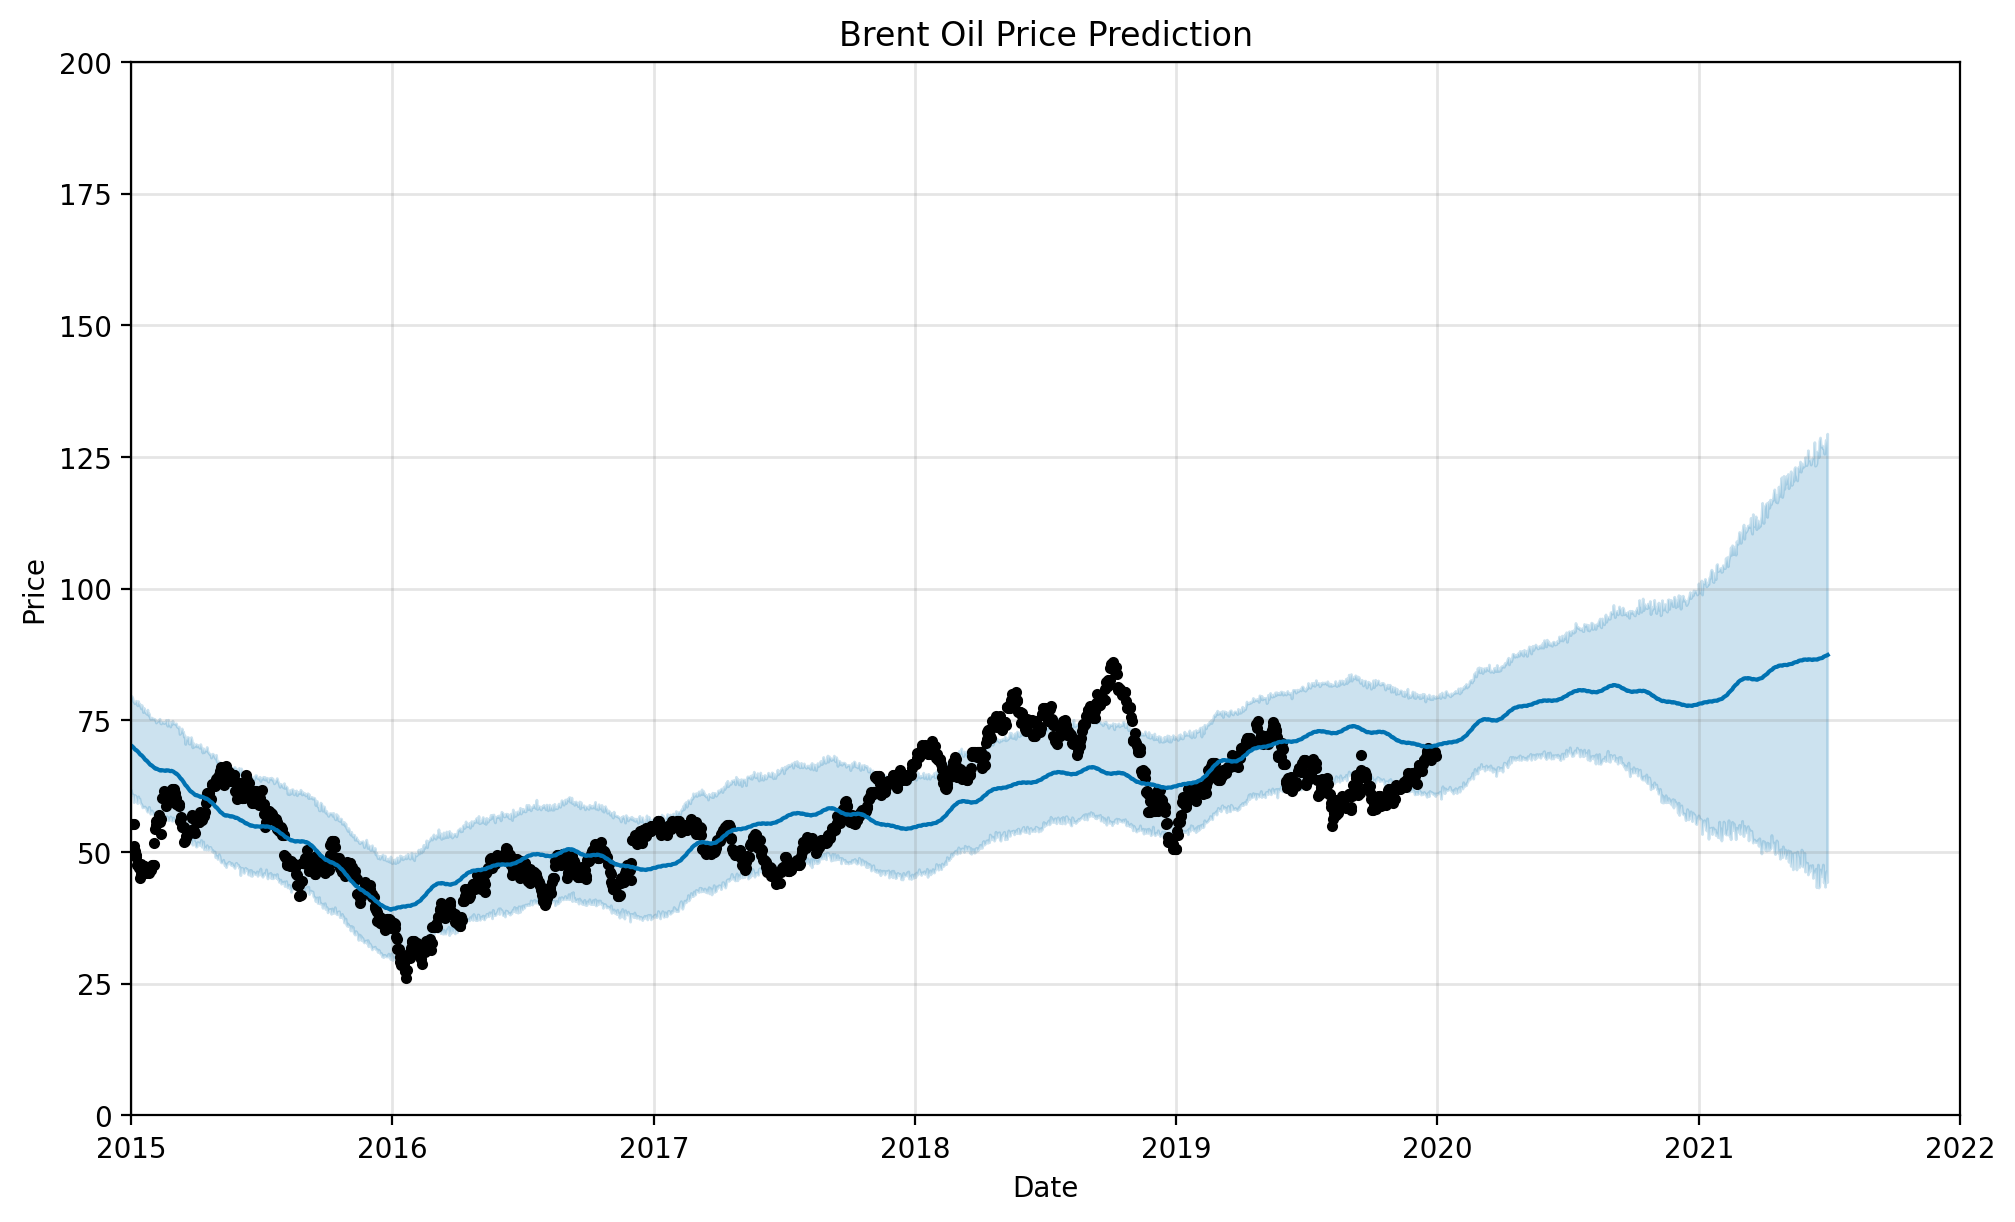

In [113]:
plt.figure()
model.plot(forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Brent Oil Price Prediction')
plt.xlim([dt.date(2015, 1, 1), dt.date(2022, 1, 1)])
plt.ylim([0,200])

In [127]:
forecast2021 = forecast[(forecast['ds' ] >= end)]
forecast2021.yhat.describe()

count   548.00
mean     79.54
std       4.08
min      70.21
25%      77.83
50%      79.42
75%      81.56
max      87.42
Name: yhat, dtype: float64

In [119]:
ARIMA2021.describe()

,predictions
count,548.00
mean,46.16
std,11.66
min,9.05
25%,40.91
50%,48.72
75%,54.77
max,70.25
